## Exercício 1) 

*Dada a rede bipartida do slide 22 (Fig. 4.14a), crie uma função que a receba como entrada e gere as redes de co-ocorrência possíveis, a partir de duas projeções. Espera-se uma projeção como a do item b da mesma Figura (pessoas são nós) e também a projeção em que os nós são os sites. As redes resultantes possuem pesos.*

Dica: Existem funções prontas tanto no igraph quanto na networkx que fazem esse tipo de projeção.


In [19]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [20]:
R = nx.Graph()
# Add nodes with the node attribute "bipartite"
R.add_nodes_from(["alice", "bob", "charlie", "donna", "eve"], bipartite=0)
R.add_nodes_from(["dailyshow.com", "huffingtonpost.com", "foxnews.com", "drudgereport.com"], bipartite=1)
# Add edges only between nodes of opposite node sets
R.add_edges_from([("alice", "dailyshow.com"), ("alice", "huffingtonpost.com"), ("bob", "dailyshow.com"), ("bob", "huffingtonpost.com"), ("donna", "foxnews.com"), ("donna", "drudgereport.com"), ("eve","foxnews.com"), ("eve","drudgereport.com"), ("charlie","dailyshow.com"), ("charlie","huffingtonpost.com")])


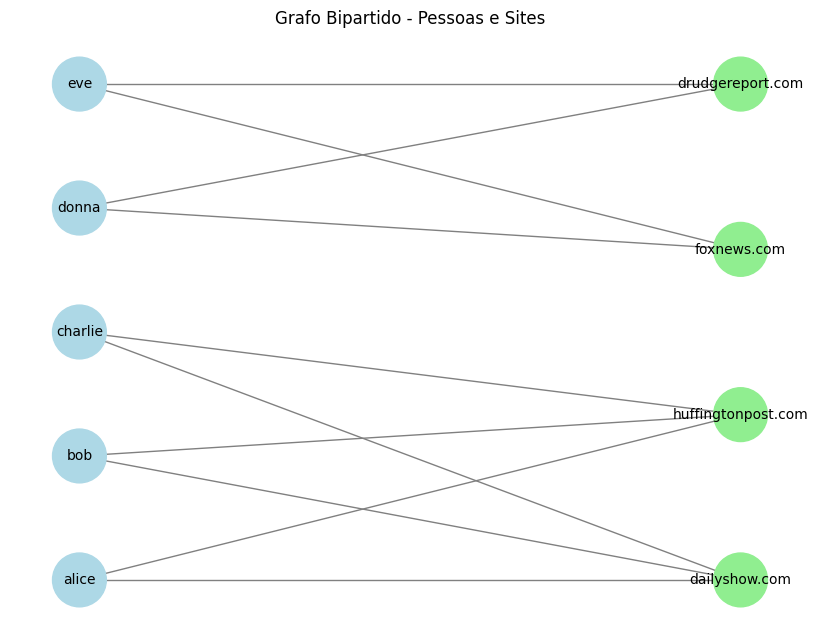

In [21]:
# Separando os nós bipartidos
pessoas_nodes = ["alice", "bob", "charlie", "donna", "eve"]
sites_nodes = ["dailyshow.com", "huffingtonpost.com", "foxnews.com", "drudgereport.com"]

# Criando o layout bipartido
pos = nx.bipartite_layout(R, pessoas_nodes)

# Desenhando os nós de pessoas e sites com cores diferentes
plt.figure(figsize=(8, 6))
nx.draw(R, pos, with_labels=True, node_color=["lightblue" if node in pessoas_nodes else "lightgreen" for node in R.nodes()], 
        node_size=1500, font_size=10, font_color="black", edge_color="gray")

plt.title("Grafo Bipartido - Pessoas e Sites")
plt.show()


In [22]:
def redes_recorrencias(G, pessoas_nodes, sites_nodes): 
    return nx.bipartite.weighted_projected_graph(G, pessoas_nodes), nx.bipartite.weighted_projected_graph(G, sites_nodes)

pessoas, sites = redes_recorrencias(R,["alice", "bob", "charlie", "donna", "eve"], ["dailyshow.com", "huffingtonpost.com", "foxnews.com", "drudgereport.com"])


Rede de Pessoas


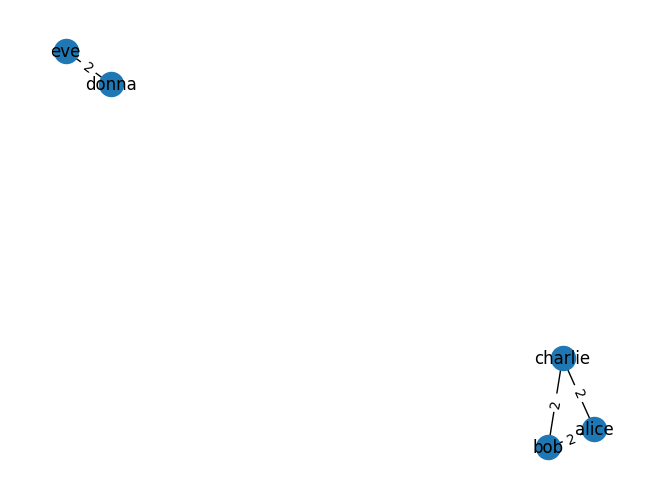

Rede de Sites


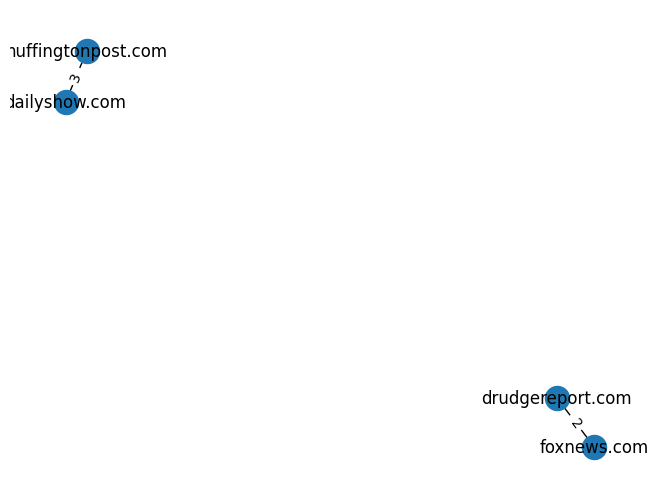

In [23]:
# Função para desenhar a rede com os pesos das arestas
def desenha_rede_com_pesos(G):
    pos = nx.spring_layout(G)  # Layout da rede
    nx.draw(G, pos, with_labels=True)  # Desenha os nós e arestas
    labels = nx.get_edge_attributes(G, 'weight')  # Pega os pesos das arestas
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)  # Adiciona os rótulos com os pesos

# Desenho da rede de pessoas com os pesos nas arestas
print("Rede de Pessoas")
desenha_rede_com_pesos(pessoas)
plt.show()

# Desenho da rede de sites com os pesos nas arestas
print("Rede de Sites")
desenha_rede_com_pesos(sites)
plt.show()



## Exercício 2)

*Compute e exiba as seguintes métricas para cada rede gerada no exercício anterior: o strengh de cada nó, o grau de cada nó, o betweenness de cada nó, o parâmetro de heterogeneidade da rede.*


In [24]:
def sgb_rede(G):
    # Graus
    graus = G.degree()
    print('Graus (nó, grau):')
    for g in graus:
        print(g)
    print()

    # Strengh
    graus = G.degree(weight='weight')
    print('Strengh (nó, strengh):')
    for g in graus:
        print(g)
    print()

    # Betweennes
    betweenness = nx.betweenness_centrality(G, weight='weight')
    print('Betweenness (nó, betweenness):')
    for b in betweenness.items():
        print(b)
    
    
def heterogenidade(G):
    graus = [grau for _, grau in G.degree()]

    media = np.mean(graus)
    media_dos_quadrados = (np.copy(media))**2
    
    return media_dos_quadrados/(media**2)

# Métricas para rede de pessoas
print(f'Heterogeneidade da rede pessoas: {heterogenidade(pessoas)}')
print('Strengh, grau e betweennes de cada nó da rede de pessoas:')
sgb_rede(pessoas)


# Métricas para rede de sites
print(f'Heterogeneidade da rede sites: {heterogenidade(sites)}')
print('Strengh, grau e betweennes de cada nó da rede de sites:')
sgb_rede(sites)


Heterogeneidade da rede pessoas: 1.0
Strengh, grau e betweennes de cada nó da rede de pessoas:
Graus (nó, grau):
('alice', 2)
('bob', 2)
('charlie', 2)
('donna', 1)
('eve', 1)

Strengh (nó, strengh):
('alice', 4)
('bob', 4)
('charlie', 4)
('donna', 2)
('eve', 2)

Betweenness (nó, betweenness):
('alice', 0.0)
('bob', 0.0)
('charlie', 0.0)
('donna', 0.0)
('eve', 0.0)
Heterogeneidade da rede sites: 1.0
Strengh, grau e betweennes de cada nó da rede de sites:
Graus (nó, grau):
('dailyshow.com', 1)
('huffingtonpost.com', 1)
('foxnews.com', 1)
('drudgereport.com', 1)

Strengh (nó, strengh):
('dailyshow.com', 3)
('huffingtonpost.com', 3)
('foxnews.com', 2)
('drudgereport.com', 2)

Betweenness (nó, betweenness):
('dailyshow.com', 0.0)
('huffingtonpost.com', 0.0)
('foxnews.com', 0.0)
('drudgereport.com', 0.0)
